In [0]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

In [8]:
df = pd.read_csv('https://d3c33hcgiwev3.cloudfront.net/_8d955d45315ff739d75fd4de3c97acf9_abalone.csv?Expires=1587859200&Signature=fwkMUg0POn-IlTporXxdel21dtLWFx0hnt2JcxmghCxx339tnEpMHzEXMRr8Al5XohBu~Z~3SJwFlOzWhZu~ctTqrsrAvRcY7uk7tugyTlgvfKCEVyCmTwHUxxvz55sp9RRkpbLUtKzLoAm0ykNvtiT1tMuzfbPOTmIlkzNkIck_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A')
df['Sex'].replace({'M': 1,'I': 0,'F': -1}, inplace=True)
df.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [0]:
y = df.iloc[:, -1]
X = df.iloc[:, :-1]

In [0]:
cv = KFold(n_splits=5, shuffle=True, random_state=1)

res = []
for i in range(1, 51):
  model = RandomForestRegressor(n_estimators=i, n_jobs=-1, random_state=1)
  res.append(cross_val_score(model, X, y, cv=cv, scoring="r2").mean())

In [26]:
for i, score in enumerate(res):
  if score > 0.52:
    print(i + 1)
    break

21


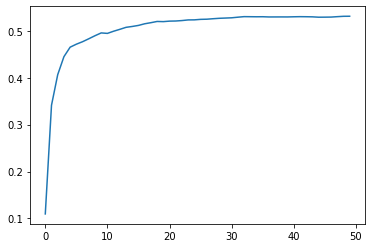

In [15]:
pd.Series(res).plot()